In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [20]:
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))

2.10.1
[]


In [21]:
dataframe = pd.read_csv('../Datasets/Fish.csv')
dataframe.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [22]:
dataframe.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [23]:
dataframe.shape

(159, 7)

In [24]:
x = dataframe['Species'].unique()
x

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [25]:
df1 = dataframe
df1['Species'] = pd.factorize(dataframe['Species'])[0]

In [26]:
X = df1.iloc[:,1:]
y = df1.iloc[:,0]
print(X.shape)
print(y.shape)
print(y.iloc[157])

(159, 6)
(159,)
6


In [27]:
from sklearn.utils import shuffle 

X, y = shuffle(X, y)

In [28]:

scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)
for i in range(0,5):
    print(X_scaled[i])

(159, 6)
[0.39393939 0.45631068 0.45636364 0.50506757 0.73978153 0.65967524]
[0.32727273 0.40776699 0.41090909 0.42567568 0.52329266 0.77728913]
[0.10242424 0.2815534  0.28363636 0.31081081 0.33699778 0.39292963]
[0.00739394 0.0776699  0.06909091 0.0777027  0.02101157 0.04877086]
[0.04181818 0.17475728 0.17818182 0.19425676 0.20720778 0.25007048]


In [29]:
model = Sequential([
    Dense(units=20, input_shape=(6,), activation='relu'),
    Dense(units=10, activation='relu'),
    Dense(units=7, activation='softmax')
])

In [30]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(x=X_scaled,y=y,batch_size=10,epochs=30,verbose=2)

Epoch 1/30


16/16 - 1s - loss: 1.9637 - accuracy: 0.0252 - 529ms/epoch - 33ms/step
Epoch 2/30
16/16 - 0s - loss: 1.9604 - accuracy: 0.0189 - 38ms/epoch - 2ms/step
Epoch 3/30
16/16 - 0s - loss: 1.9574 - accuracy: 0.0692 - 26ms/epoch - 2ms/step
Epoch 4/30
16/16 - 0s - loss: 1.9544 - accuracy: 0.1069 - 27ms/epoch - 2ms/step
Epoch 5/30
16/16 - 0s - loss: 1.9518 - accuracy: 0.1447 - 28ms/epoch - 2ms/step
Epoch 6/30
16/16 - 0s - loss: 1.9488 - accuracy: 0.1824 - 33ms/epoch - 2ms/step
Epoch 7/30
16/16 - 0s - loss: 1.9462 - accuracy: 0.2013 - 33ms/epoch - 2ms/step
Epoch 8/30
16/16 - 0s - loss: 1.9435 - accuracy: 0.2075 - 35ms/epoch - 2ms/step
Epoch 9/30
16/16 - 0s - loss: 1.9409 - accuracy: 0.2201 - 33ms/epoch - 2ms/step
Epoch 10/30
16/16 - 0s - loss: 1.9384 - accuracy: 0.2201 - 33ms/epoch - 2ms/step
Epoch 11/30
16/16 - 0s - loss: 1.9357 - accuracy: 0.2201 - 33ms/epoch - 2ms/step
Epoch 12/30
16/16 - 0s - loss: 1.9332 - accuracy: 0.2201 - 32ms/epoch - 2ms/step
Epoch 13/30
16/16 - 0s - loss: 1.9308 - accura

#### Using validation split

In [32]:
hist = model.fit(x=X_scaled,y=y,validation_split=0.2,batch_size=10,epochs=30,verbose=2)

Epoch 1/30
13/13 - 0s - loss: 1.8979 - accuracy: 0.2205 - val_loss: 1.8986 - val_accuracy: 0.2500 - 248ms/epoch - 19ms/step
Epoch 2/30
13/13 - 0s - loss: 1.8967 - accuracy: 0.2205 - val_loss: 1.8978 - val_accuracy: 0.2500 - 97ms/epoch - 7ms/step
Epoch 3/30
13/13 - 0s - loss: 1.8953 - accuracy: 0.2205 - val_loss: 1.8970 - val_accuracy: 0.2500 - 77ms/epoch - 6ms/step
Epoch 4/30
13/13 - 0s - loss: 1.8941 - accuracy: 0.2205 - val_loss: 1.8961 - val_accuracy: 0.2500 - 80ms/epoch - 6ms/step
Epoch 5/30
13/13 - 0s - loss: 1.8928 - accuracy: 0.2205 - val_loss: 1.8950 - val_accuracy: 0.2500 - 73ms/epoch - 6ms/step
Epoch 6/30
13/13 - 0s - loss: 1.8916 - accuracy: 0.2205 - val_loss: 1.8943 - val_accuracy: 0.2500 - 76ms/epoch - 6ms/step
Epoch 7/30
13/13 - 0s - loss: 1.8902 - accuracy: 0.2205 - val_loss: 1.8932 - val_accuracy: 0.2500 - 79ms/epoch - 6ms/step
Epoch 8/30
13/13 - 0s - loss: 1.8889 - accuracy: 0.2205 - val_loss: 1.8922 - val_accuracy: 0.2500 - 79ms/epoch - 6ms/step
Epoch 9/30
13/13 - 0s 

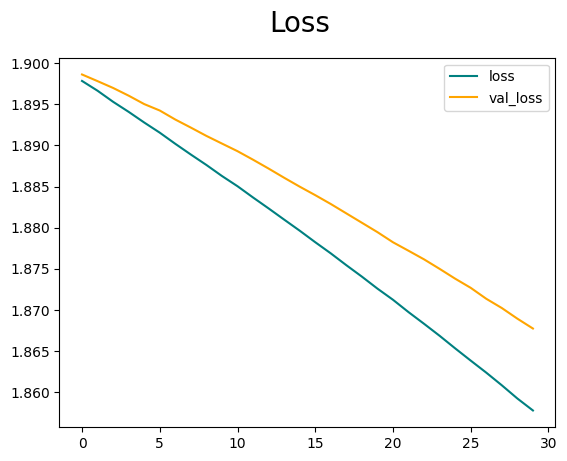

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

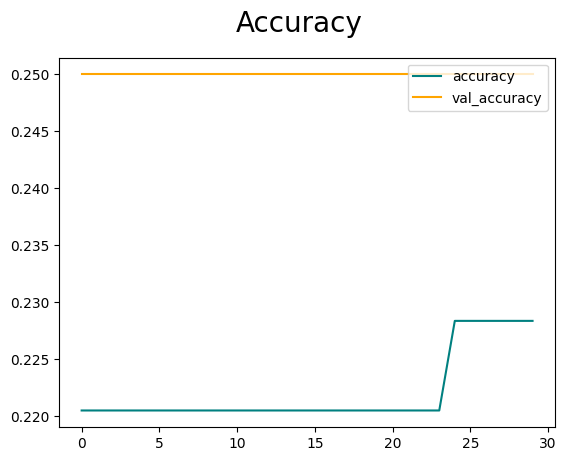

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'orange',label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper right')
plt.show()

#### Using validation test set

In [35]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)



In [38]:
hist2 = model.fit(x=X_train_scaled,y=y_train,batch_size=10,epochs=100,verbose=2)

Epoch 1/100
13/13 - 0s - loss: 1.8202 - accuracy: 0.1969 - 35ms/epoch - 3ms/step
Epoch 2/100
13/13 - 0s - loss: 1.8185 - accuracy: 0.1969 - 28ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 1.8167 - accuracy: 0.1969 - 27ms/epoch - 2ms/step
Epoch 4/100
13/13 - 0s - loss: 1.8149 - accuracy: 0.1969 - 36ms/epoch - 3ms/step
Epoch 5/100
13/13 - 0s - loss: 1.8131 - accuracy: 0.1969 - 37ms/epoch - 3ms/step
Epoch 6/100
13/13 - 0s - loss: 1.8112 - accuracy: 0.1969 - 33ms/epoch - 3ms/step
Epoch 7/100
13/13 - 0s - loss: 1.8094 - accuracy: 0.2047 - 32ms/epoch - 2ms/step
Epoch 8/100
13/13 - 0s - loss: 1.8075 - accuracy: 0.1969 - 26ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 1.8057 - accuracy: 0.2047 - 39ms/epoch - 3ms/step
Epoch 10/100
13/13 - 0s - loss: 1.8038 - accuracy: 0.2047 - 45ms/epoch - 3ms/step
Epoch 11/100
13/13 - 0s - loss: 1.8018 - accuracy: 0.2047 - 40ms/epoch - 3ms/step
Epoch 12/100
13/13 - 0s - loss: 1.8000 - accuracy: 0.2047 - 44ms/epoch - 3ms/step
Epoch 13/100
13/13 - 0s -

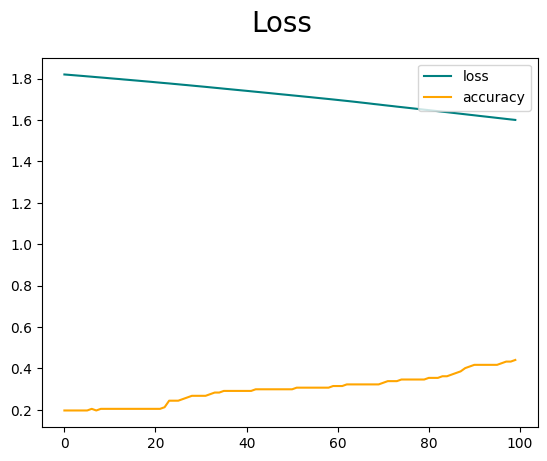

In [39]:
fig = plt.figure()
plt.plot(hist2.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist2.history['accuracy'],color = 'orange',label = 'accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [21]:
y_pred = model.predict(X_test_scaled,batch_size=10,verbose=0)

In [25]:
Precision??

Init signature:
Precision(
    thresholds=None,
    top_k=None,
    class_id=None,
    name=None,
    dtype=None,
)
Source:        
@keras_export("keras.metrics.Precision")
class Precision(base_metric.Metric):
    """Computes the precision of the predictions with respect to the labels.

    The metric creates two local variables, `true_positives` and
    `false_positives` that are used to compute the precision. This value is
    ultimately returned as `precision`, an idempotent operation that simply
    divides `true_positives` by the sum of `true_positives` and
    `false_positives`.

    If `sample_weight` is `None`, weights default to 1.
    Use `sample_weight` of 0 to mask values.

    If `top_k` is set, we'll calculate precision as how often on average a class
    among the top-k classes with the highest predicted values of a batch entry
    is correct and can be found in the label for that entry.

    If `class_id` is specified, we calculate precision by considering only the
    